# 2. Процессы дискретизации и квантования изображени

## 2.1. Дискретизация изображения

### Задание 2.1.
Выбрать значение шага дискретизации в пределах от 5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

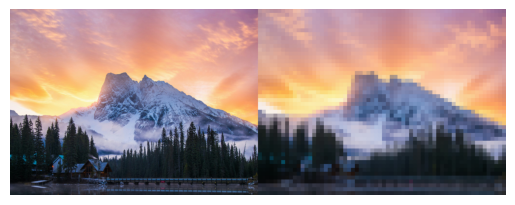

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('nature.jpg')  # Загрузим и сохраним изображение
img = image.copy()  # Создадим копию изображения, над которым и выполним дискретизацию
K = 10  # Зададим размер шага изображения (количество пикселей в этом изображении будет K*K)
s = img.shape  # Получаем размер исходного изображения и его тональность.
h1, w1 = s[0], s[1]  # Запоминаем отдельно высоту и ширину исходного изображения
h = (s[0 - s[0] % K])  # Делим высоту на шаг с выделением остатка и вычитаем это из начальной высоты
# Например: (641 - 641 % 10) = 641 - 1 = 640. Это позволяет за указанное кол-во шагов пройти все изображение точно без остатка
w = (s[1] - s[1] % K)  # То же самое для высоты
img = cv2.resize(img, (w, h))  # Меняем размер изображения на новые высоту и ширину
# Пробегаем все изображение по высоте (сверху вниз) с шагом K
for y in range(0, h - 1, K):
    # Для каждого из пикселей - пробегаем все изображение по ширине (слева направо) с шагом K
    for x in range(0, w - 1, K):
        # В цветном строка len вернет число 3 (так как у цветного параметра -  высота ширина и число каналов rgb), в полутоновом строка вернет число 2 (высота ширина)
        if len(s) > 2:
            # Функция np.average вычисляет средневзвешанное значение оси (здесь это -средний цвет изображения). Здесь img[y: (y + K), x: (x + K)] - вырезаем фрагмент изображения от текущего значения высоты y до K: (y:(y+K)), то же самое и для ширины x
            s = np.average(img[y: (y + K), x: (x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
            # Повторяем действие вычисления среднего значения цвета от предыдущего значения s (нужно для цветного изображения) и записываем это значение во весь блок изображения img[y:(y + K), x:(x + K)] (красим текущий блок изображения его средним значением)
        # Если же строка возвращает значение меньше 3 (2 − ширина и высота), значит это полутоновое изображение, находим среднее значение цвета блока и красим его в этот цвет (как в предыдущем шаге)
        else:
            s = img[y:(y + K), x:(x + K)]
            img[y:(y + K), x:(x + K)] = np.average(s)

img = cv2.resize(img, (w1, h1))
# Возвращаем размер изображения к размеру исходного изображения
res = np.hstack((image, img))
# Объединим исходное и дискретизированное изображение в одно окно для сравнения
plt.imshow(res[...,::-1])
plt.axis("off");
# cv2.imshow("Img", res)  # И выведем это окно на экран
# cv2.waitKey(0)
# cv2.destroyAllWindows()


## 2.2. Квантование изображения

### Задание 2.2.
Проквантовать изображение, сократив число градаций до 4

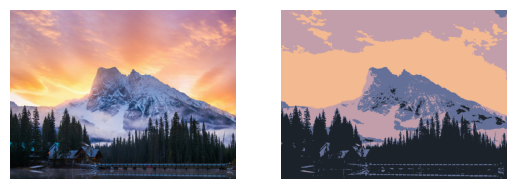

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.subplot(121)
img = cv2.imread('nature.jpg')
plt.imshow(img[...,::-1]) # Меняем формат BGR на RGB
plt.axis("off");
plt.subplot(122)
# Изменяем размер массива изображения, где (–1,3) – задаем число строк и столбцов, в которые помещаем прежний массив. В данном случае 3 – означает в 3 столбца, а –1 это исключение, означает что мы даем python самому понять во сколько строк это можно уместить
Z = img.reshape(-1, 3)
Z = np.float32(Z)  # преобразуем массив к float (числа с плавающей точкой)
crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4  # Количество градаций изображения
ret, label, center = cv2.kmeans(Z, K, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)  # Функция квантования
# Преобразуем изображение к начальному виду:
center = np.uint8(center)  # Преобразование матрицы к формату uint8 (от 0 до 255)
res = center[label.flatten()]  # Сворачиваем массив нескольких матриц в одну
res2 = res.reshape(img.shape)
# Выводим изображение на экран:
plt.imshow(res2[...,::-1]) # Меняем формат BGR на RGB
plt.axis("off");
# cv2.imshow("Img", res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()